# Tutorial 2a  - Tracing and Analyzing Rays

### May 2024

This tutorial shows how to trace rays through a system, and how ray information can be retrieved and analyzed.

In [1]:
import matplotlib.pyplot as plt

from optiland import distribution
from optiland.samples.objectives import ReverseTelephoto

In [2]:
lens = ReverseTelephoto()

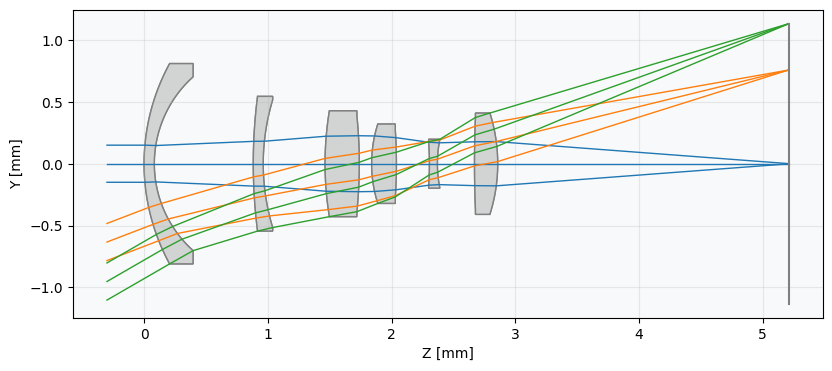

In [3]:
lens.draw()

First, we'll take a look at a few different pupil grids that we can trace through the system. Note that each distribution has `x` and `y` attributes, which are NumPy arrays containing the points of the distribution.

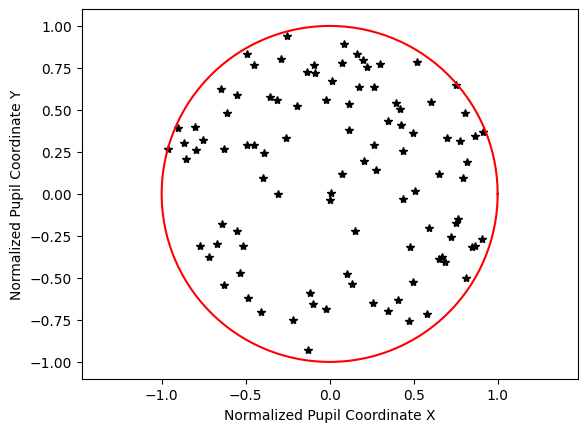

In [4]:
dist_rand = distribution.RandomDistribution(seed=None)
dist_rand.generate_points(num_points=100)
dist_rand.view()

Note that for a uniform distribution, we define the number of points along one axis.

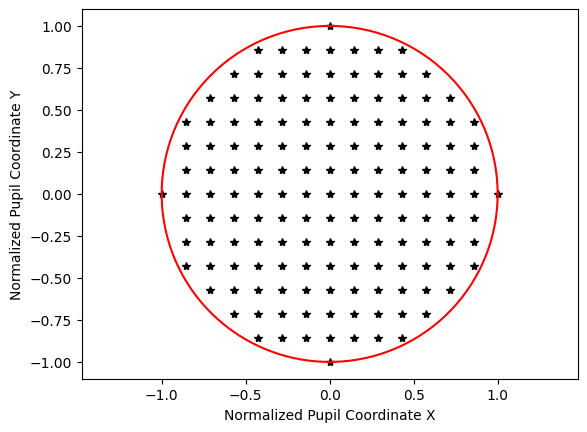

In [5]:
dist_uniform = distribution.UniformDistribution()
dist_uniform.generate_points(num_points=15)
dist_uniform.view()

The next distribution is the Gaussian qaudrature, which is an optimized grid for lens design based on the following paper. Essentially, this grid probes the pupil in such a way so as to accurately determine the wavefront while minimizing the number of rays traced.

G. W. Forbes, "Optical system assessment for design: numerical ray tracing in the Gaussian pupil," J. Opt. Soc. Am. A 5, 1943-1956 (1988)

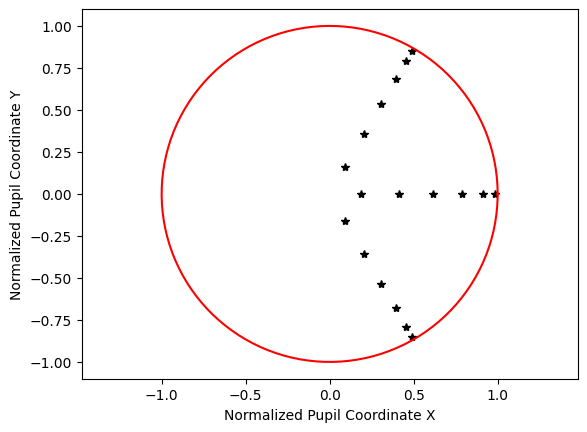

In [6]:
dist_quad = distribution.GaussianQuadrature(is_symmetric=False)
dist_quad.generate_points(num_rings=6)
dist_quad.view()

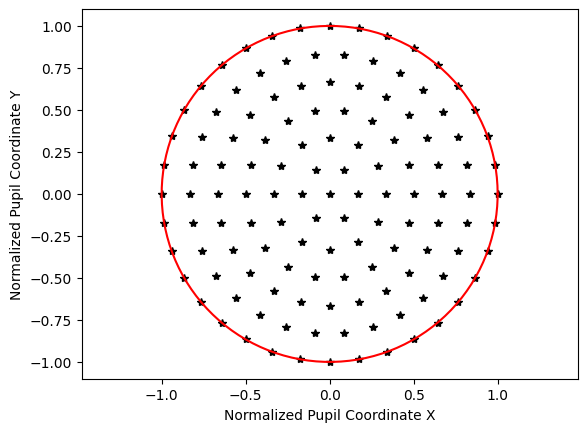

In [7]:
dist_hex = distribution.HexagonalDistribution()
dist_hex.generate_points(num_rings=6)
dist_hex.view()

Now, let's trace a grid of rays through the reverse telephoto lens.

We use the normalized field coordinates (Hx, Hy) and trace the on-axis field at (0, 0). We specify the wavelength and grid distribution.

In [8]:
rays = lens.trace(Hx=0, Hy=0, wavelength=0.55, num_rays=1024, distribution="random")

There are many ray properties we can extract:

- x, y, z intersections per surface
- L, M, N ray direction cosines per surface
- Ray intensity
- Ray optical path length


Let's plot a few of these to show how to access them.

In [9]:
num_surfaces = lens.surface_group.num_surfaces

# take intersection points on last surface only
x_image = lens.surface_group.x[num_surfaces - 1, :]
y_image = lens.surface_group.y[num_surfaces - 1, :]

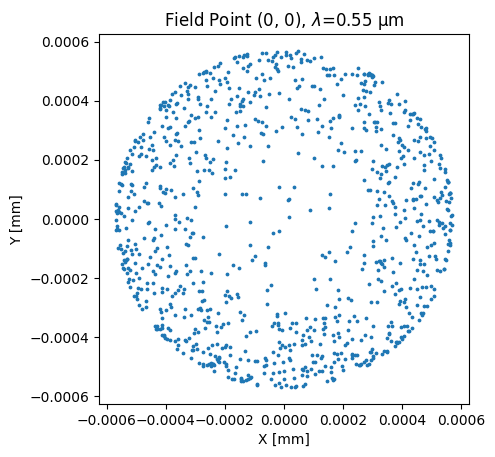

In [10]:
plt.scatter(x_image, y_image, s=3)
plt.axis("image")
plt.xlabel("X [mm]")
plt.ylabel("Y [mm]")
plt.title("Field Point (0, 0), $\\lambda$=0.55 µm")
plt.show()

Let's add the optical path length of the ray as the color attribute of each point. Let's trace a different distribution to use for plotting.

In [11]:
lens.trace(Hx=0, Hy=1, wavelength=0.55, num_rays=15, distribution="hexapolar")

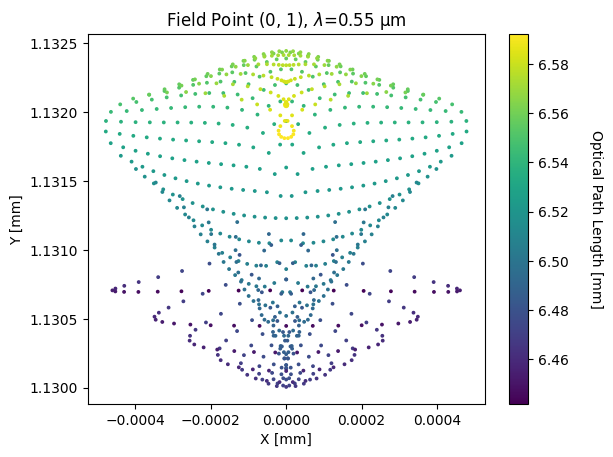

In [12]:
opd = lens.surface_group.opd[num_surfaces - 1, :]
x_image = lens.surface_group.x[num_surfaces - 1, :]
y_image = lens.surface_group.y[num_surfaces - 1, :]

plt.scatter(x_image, y_image, s=3, c=opd)
plt.xlabel("X [mm]")
plt.ylabel("Y [mm]")
plt.title("Field Point (0, 1), $\\lambda$=0.55 µm")
cbar = plt.colorbar()
cbar.ax.get_yaxis().labelpad = 25
cbar.ax.set_ylabel("Optical Path Length [mm]", rotation=270)
plt.show()

Lastly, let's look at the z direction cosine of the rays. This shows how close the rays are to parallel with the optical axis.

Again, let's retrace a grid of rays. This time we'll use an arbitrary field with "many" rays (≈128**2)

In [13]:
rays = lens.trace(
    Hx=0.825,
    Hy=0.478,
    wavelength=0.567,
    num_rays=128,
    distribution="uniform",
)

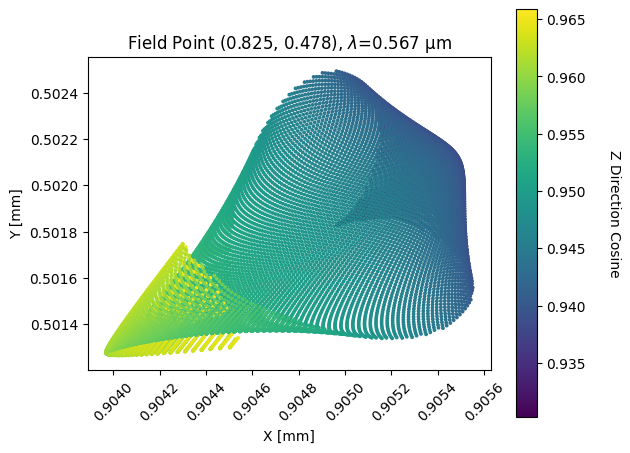

In [14]:
x_image = lens.surface_group.x[num_surfaces - 1, :]
y_image = lens.surface_group.y[num_surfaces - 1, :]
N = lens.surface_group.N[num_surfaces - 1, :]

plt.scatter(x_image, y_image, s=3, c=N)
plt.axis("image")
plt.xlabel("X [mm]")
plt.ylabel("Y [mm]")
plt.title("Field Point (0.825, 0.478), $\\lambda$=0.567 µm")
cbar = plt.colorbar()
cbar.ax.get_yaxis().labelpad = 25
cbar.ax.set_ylabel("Z Direction Cosine", rotation=270)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

There are many other properties available, which can be seen in optiland.surfaces.SurfaceGroup.

In general, the ray information is saved in a 2D matrix with shape (num_surfaces x num_rays). All ray information is available after ray tracing, which can be configured generically. For example, various distributions can be used, but user-defined rays may also be specified. This will be discussed later.